In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

%matplotlib inline

# Q1
* 컬럼명 rename

In [2]:
age_code = {1: '0~4세',
            2: '5~9세',
            3: '10~14세',
            4: '15~19세',
            5: '20~24세',
            6: '25~29세',
            7: '30~34세',
            8: '35~39세',
            9: '40~44세',
            10: '45~49세',
            11: '50~54세',
            12: '55~59세',
            13: '60~64세',
            14: '65~69세',
            15: '70~74세',
            16: '75~79세',
            17: '80~84세',
            18: '85세+'}


In [3]:
col_rename = {"연령대코드(5세단위)": "연령대"}
df_age_waist = df.groupby("연령대코드(5세단위)")["허리둘레"].describe()
df_age_waist = df_age_waist.rename(index=age_code, level="연령대코드(5세단위)")
df_age_waist

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# Q2

# Q3
* rename

In [4]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df_drink_smoke = df.groupby(["음주여부", "흡연상태"])["가입자일련번호"].count()
df_drink_smoke

음주여부  흡연상태
0.0   1.0     394503
      2.0      55334
      3.0      52845
1.0   1.0     213743
      2.0     120779
      3.0     162166
Name: 가입자일련번호, dtype: int64

# Q4
* rename

c:\Users\um_se\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


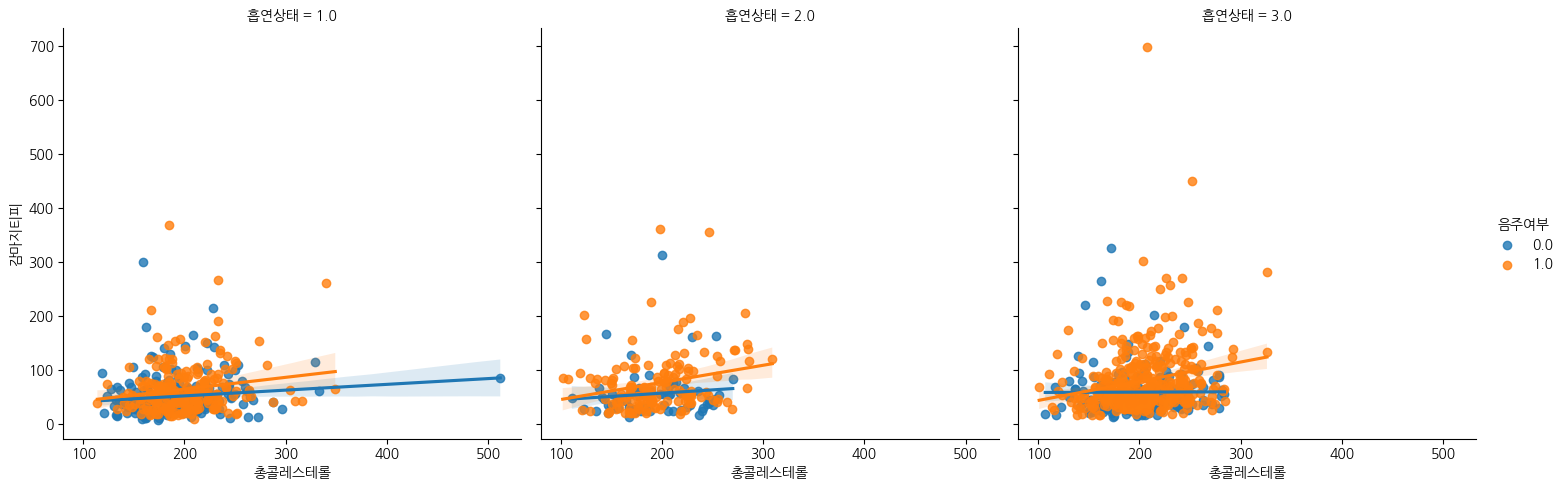

In [5]:
df_overweight = df[df["체중(5Kg 단위)"] >= 120]
df_overweight[["총콜레스테롤", "감마지티피"]]
sns.lmplot(data=df_overweight, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")


# Q5

In [6]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [7]:
df[["시력(좌)", "시력(우)"]]

,시력(좌),시력(우)
0,1.0,1.2
1,1.2,1.0
2,1.0,0.8
3,0.9,1.0
4,1.5,1.5
...,...,...
999995,1.5,1.5
999996,1.2,1.5
999997,0.2,1.0
999998,0.8,0.9
